<a href="https://colab.research.google.com/github/henry5250/lab_eda/blob/main/lab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [2]:
import pandas as pd

#list of variables we chose to keep
var_list = [
    'year',            # year of survey
    'wrkstat',         # labor force status
    'degree',          # respondent's highest degree
    'childs',          # number of children
    'marital',         # marital status
    'sex',             # respondents sex
    'race',            # race of respondent
    'income',          # total family income
    'happy',           # happiness index
    'partyid'          # political party affiliation
]


output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to

phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

#list to store the chunks of data into a parquet file
all_chunks = []

for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet'
    df = pd.read_parquet(url)
    all_chunks.append(df.loc[:, var_list])

#concat all chunks into a single df
gss_df = pd.concat(all_chunks, ignore_index=True)

gss_df = gss_df[gss_df['year'] != 1972]

#save the combined df to a CSV file (easier to use for EDA)
gss_df.to_csv(output_filename, index=False)
print(f"Loaded and saved as'{output_filename}'")
display(gss_df.head(20))

Loaded and saved as'selected_gss_data.csv'


,year,wrkstat,degree,childs,marital,sex,race,income,happy,partyid
1613,1973,working full time,less than high school,1.0,married,male,white,"$10,000 to $14,999",not too happy,other party
1614,1973,keeping house,less than high school,2.0,married,female,white,"$7,000 to $7,999",very happy,not very strong democrat
1615,1973,working full time,less than high school,8.0,married,female,white,"$10,000 to $14,999",pretty happy,"independent, close to republican"
1616,1973,working full time,high school,2.0,married,male,white,"$10,000 to $14,999",pretty happy,not very strong democrat
1617,1973,keeping house,less than high school,4.0,married,female,white,"$10,000 to $14,999",pretty happy,"independent, close to republican"
1618,1973,working full time,high school,3.0,divorced,female,white,"$10,000 to $14,999",pretty happy,not very strong democrat
1619,1973,keeping house,less than high school,3.0,married,female,white,"$4,000 to $4,999",very happy,"independent, close to democrat"
1620,1973,working full time,bachelor's,0.0,never married,male,white,"$7,000 to $7,999",pretty happy,not very strong democrat
1621,1973,keeping house,less than high school,2.0,widowed,female,white,"$1,000 to $2,999",pretty happy,not very strong democrat
1622,1973,working full time,bachelor's,1.0,married,male,white,"$15,000 to $19,999",very happy,"independent, close to republican"


###Why These Variables
We chose to go with these variables specifically because these seem to be significant indicators of both social status and general well being. Specifically, these variables were consistently a question in the survey from at least 1973 onward (income was a separate variable for the 1972 survey, so we decided to drop that year).

Each variable serves a unique purpose for our analysis. The 'year' serves as a consistent independent variable that can be used to see trends in the data over time and make inferences about how contemporary events/circumstances affect the data. The 'wrkstat' column allows us to see in what way the respondent works which defines a majority of their waking hours. The 'degree' column shows the highest degree earned which often correlates with income, children, party affiliation, and demographic data. 'childs' is the number of children the respondent has which may be correlated with marital status, happiness, and work status. 'marital' serves as our indicator of marital status which can be broken into values to see how divorcees or married individuals describe their general social status and wellbeing. We have two demographic columns 'sex' and 'race' to allow us to pull demographic comparisons. 'income' is one of the most useful columns in that it often determines how much access to leisure the respondent has and has correlations across nearly all variables. 'happy' serves as a self-reported happiness index for us to examine how people view their own happiness given their social status and data. Finally, 'partyid' gives us detailed values on political party affiliation so we can draw conclusions from their political ideology.

Most importantly, because most of these variables come from consistent questions across many years of this survey, there are less NaN values to process which can contribute to inaccuracies or overgeneralizations.

By nature of these columns being common questions across the many years of this survey there is evidence that these are consistently important considerations when studying social phenomena. We can also use these data to avoid biases from the survey sampling. For example, if we find that the only people filling out the survey for certain years, sexes, etc. are individuals with an income above a certain threshold, we can assume that the data is not representative of people below a certain income. By using these very set and determinative variables, we are more likely to recognize biases before more assumptions that are really just the outcome to selection bias.

In [3]:
gss_df = pd.read_csv('selected_gss_data.csv')

In [4]:
display(gss_df.head())
display(gss_df.info())

,year,wrkstat,degree,childs,marital,sex,race,income,happy,partyid
0,1973,working full time,less than high school,1.0,married,male,white,"$10,000 to $14,999",not too happy,other party
1,1973,keeping house,less than high school,2.0,married,female,white,"$7,000 to $7,999",very happy,not very strong democrat
2,1973,working full time,less than high school,8.0,married,female,white,"$10,000 to $14,999",pretty happy,"independent, close to republican"
3,1973,working full time,high school,2.0,married,male,white,"$10,000 to $14,999",pretty happy,not very strong democrat
4,1973,keeping house,less than high school,4.0,married,female,white,"$10,000 to $14,999",pretty happy,"independent, close to republican"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70777 entries, 0 to 70776
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     70777 non-null  int64  
 1   wrkstat  70741 non-null  object 
 2   degree   70604 non-null  object 
 3   childs   70524 non-null  float64
 4   marital  70726 non-null  object 
 5   sex      70665 non-null  object 
 6   race     70670 non-null  object 
 7   income   63439 non-null  object 
 8   happy    65982 non-null  object 
 9   partyid  70298 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.4+ MB


None

In [5]:
display(gss_df.isnull().sum())

,0
year,0
wrkstat,36
degree,173
childs,253
marital,51
sex,112
race,107
income,7338
happy,4795
partyid,479


In [6]:
for col in ['wrkstat', 'degree', 'marital', 'sex', 'race', 'happy', 'partyid']:
    gss_df[col] = gss_df[col].fillna('Unknown')

median_childs = gss_df['childs'].median()
gss_df['childs'] = gss_df['childs'].fillna(median_childs)

for col in ['wrkstat', 'degree', 'marital', 'sex', 'race', 'income', 'happy', 'partyid']:
    display(f"Unique values in {col}:")
    display(gss_df[col].unique())

'Unique values in wrkstat:'

array(['working full time', 'keeping house', 'retired',
       'working part time', 'in school',
       'with a job, but not at work because of temporary illness, vacation, strike',
       'unemployed, laid off, looking for work', 'other', 'Unknown'],
      dtype=object)

'Unique values in degree:'

array(['less than high school', 'high school', "bachelor's", 'graduate',
       'associate/junior college', 'Unknown'], dtype=object)

'Unique values in marital:'

array(['married', 'divorced', 'never married', 'widowed', 'separated',
       'Unknown'], dtype=object)

'Unique values in sex:'

array(['male', 'female', 'Unknown'], dtype=object)

'Unique values in race:'

array(['white', 'black', 'other', 'Unknown'], dtype=object)

'Unique values in income:'

array(['$10,000 to $14,999', '$7,000 to $7,999', '$4,000 to $4,999',
       '$1,000 to $2,999', '$15,000 to $19,999', '$5,000 to $5,999',
       '$20,000 to $24,999', '$3,000 to $3,999', nan, 'under $1,000',
       '$8,000 to $9,999', '$25,000 or more', '$6,000 to $6,999'],
      dtype=object)

'Unique values in happy:'

array(['not too happy', 'very happy', 'pretty happy', 'Unknown'],
      dtype=object)

'Unique values in partyid:'

array(['other party', 'not very strong democrat',
       'independent, close to republican',
       'independent, close to democrat', 'strong democrat',
       'independent (neither, no response)', 'not very strong republican',
       'strong republican', 'Unknown'], dtype=object)

In [7]:
income_mapping = {
    'under $1,000': 500,
    '$1,000 to $2,999': 2000,
    '$3,000 to $3,999': 3500,
    '$4,000 to $4,999': 4500,
    '$5,000 to $5,999': 5500,
    '$6,000 to $6,999': 6500,
    '$7,000 to $7,999': 7500,
    '$8,000 to $9,999': 9000,
    '$10,000 to $14,999': 12500,
    '$15,000 to $19,999': 17500,
    '$20,000 to $24,999': 22500,
    '$25,000 or more': 30000 # Using 30000 as a representative value for the open-ended range
}

gss_df['income_midpoint'] = gss_df['income'].map(income_mapping)
gss_df['income_midpoint'] = gss_df['income_midpoint'].fillna(gss_df['income_midpoint'].median())


for col in ['wrkstat', 'degree', 'marital', 'sex', 'race', 'happy', 'partyid']:
    gss_df[col] = gss_df[col].astype('category')

display(gss_df.info())
display(gss_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70777 entries, 0 to 70776
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             70777 non-null  int64   
 1   wrkstat          70777 non-null  category
 2   degree           70777 non-null  category
 3   childs           70777 non-null  float64 
 4   marital          70777 non-null  category
 5   sex              70777 non-null  category
 6   race             70777 non-null  category
 7   income           63439 non-null  object  
 8   happy            70777 non-null  category
 9   partyid          70777 non-null  category
 10  income_midpoint  70777 non-null  float64 
dtypes: category(7), float64(2), int64(1), object(1)
memory usage: 2.6+ MB


None

,year,wrkstat,degree,childs,marital,sex,race,income,happy,partyid,income_midpoint
0,1973,working full time,less than high school,1.0,married,male,white,"$10,000 to $14,999",not too happy,other party,12500.0
1,1973,keeping house,less than high school,2.0,married,female,white,"$7,000 to $7,999",very happy,not very strong democrat,7500.0
2,1973,working full time,less than high school,8.0,married,female,white,"$10,000 to $14,999",pretty happy,"independent, close to republican",12500.0
3,1973,working full time,high school,2.0,married,male,white,"$10,000 to $14,999",pretty happy,not very strong democrat,12500.0
4,1973,keeping house,less than high school,4.0,married,female,white,"$10,000 to $14,999",pretty happy,"independent, close to republican",12500.0


In [8]:
display(gss_df[['childs', 'income_midpoint']].describe())
display("Median of 'childs':", gss_df['childs'].median())
display("Mode of 'childs':", gss_df['childs'].mode()[0])
display("Median of 'income_midpoint':", gss_df['income_midpoint'].median())
display("Mode of 'income_midpoint':", gss_df['income_midpoint'].mode()[0])

,childs,income_midpoint
count,70777.000000,70777.000000
mean,1.908205,22965.688006
std,1.750061,9561.975421
min,0.000000,500.000000
25%,0.000000,12500.000000
50%,2.000000,30000.000000
75%,3.000000,30000.000000
max,8.000000,30000.000000


"Median of 'childs':"

2.0

"Mode of 'childs':"

np.float64(0.0)

"Median of 'income_midpoint':"

30000.0

"Mode of 'income_midpoint':"

np.float64(30000.0)

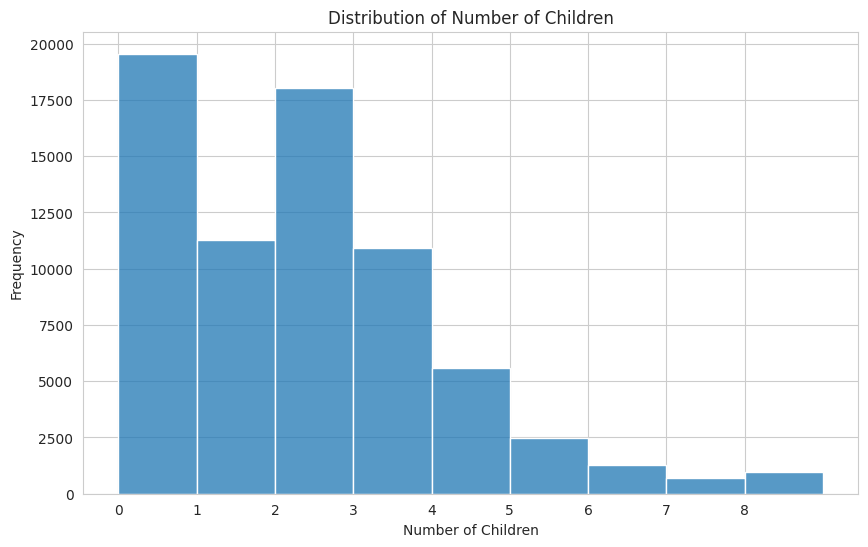

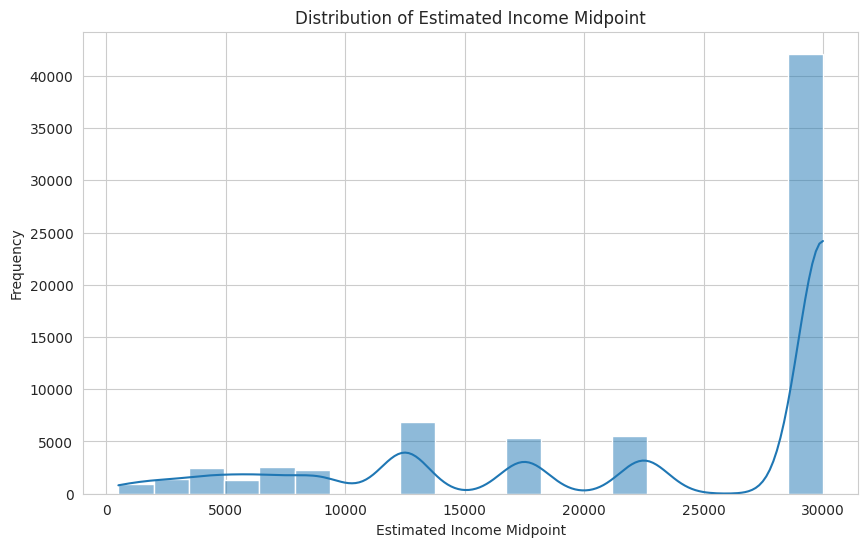

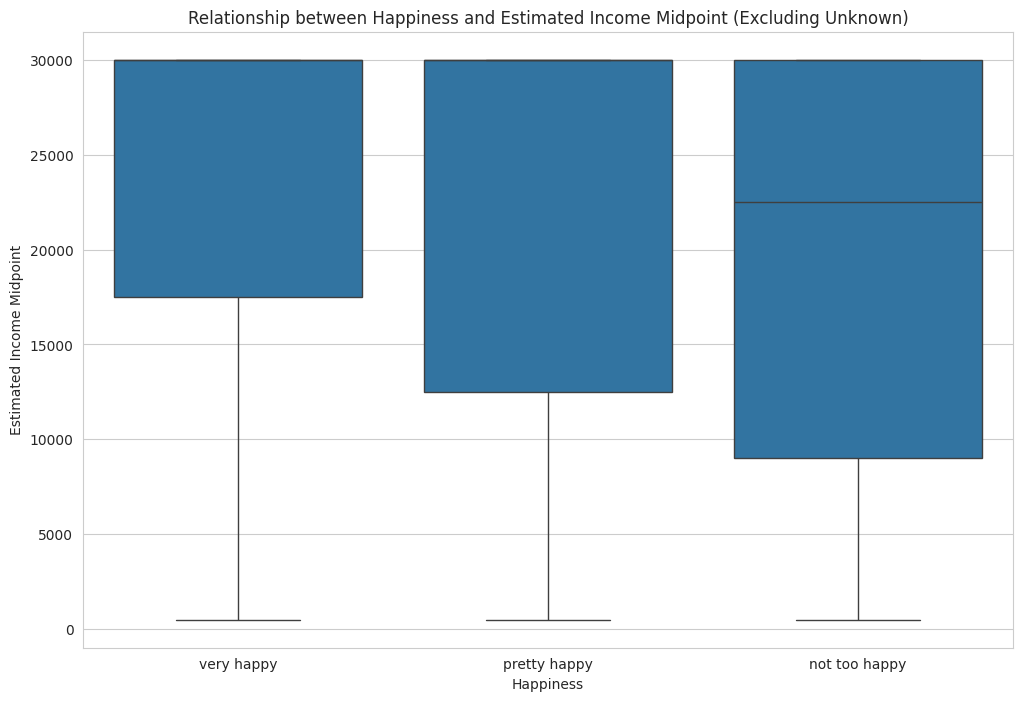

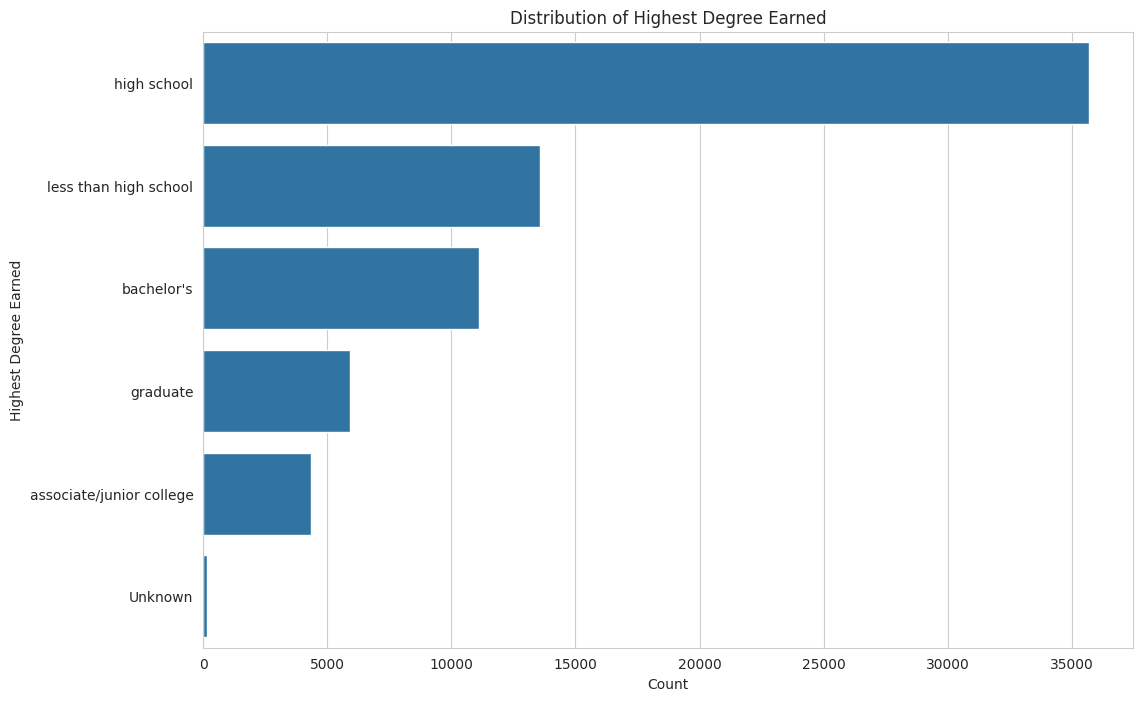

/tmp/ipython-input-4126005458.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_happy = gss_df.groupby(['marital', 'happy']).size().unstack(fill_value=0)


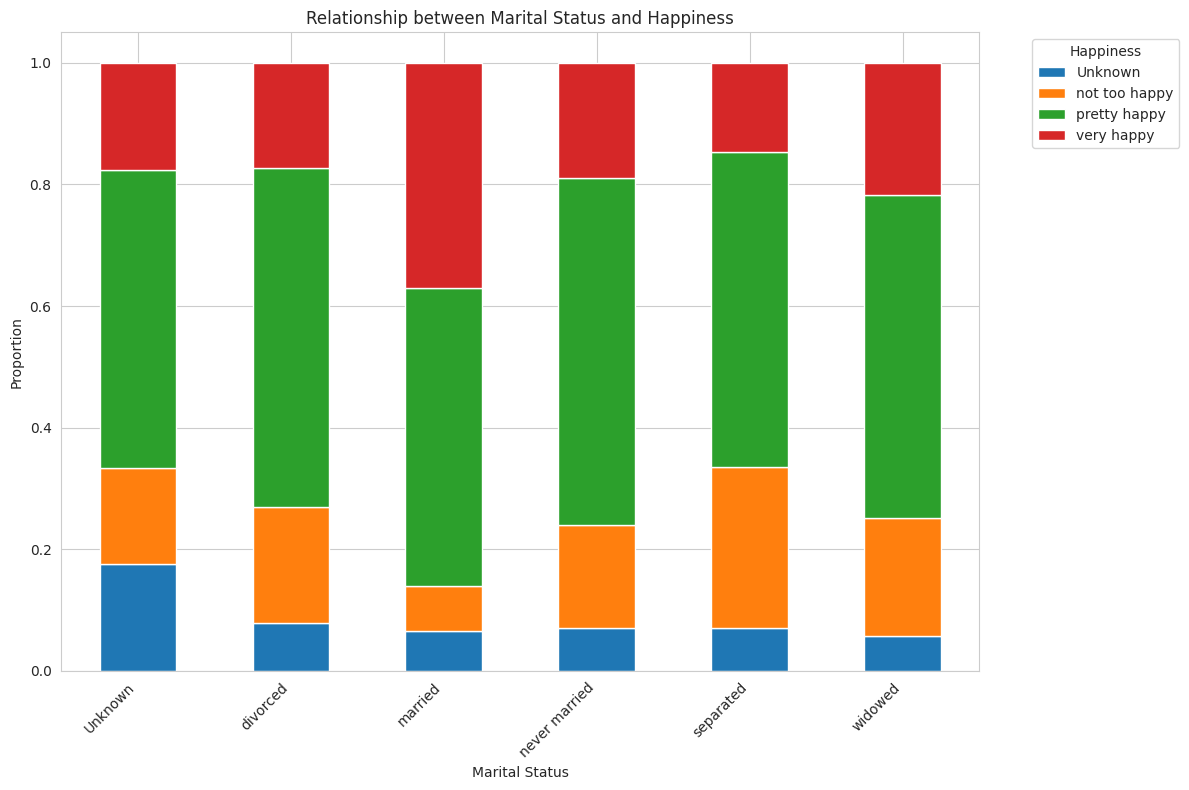

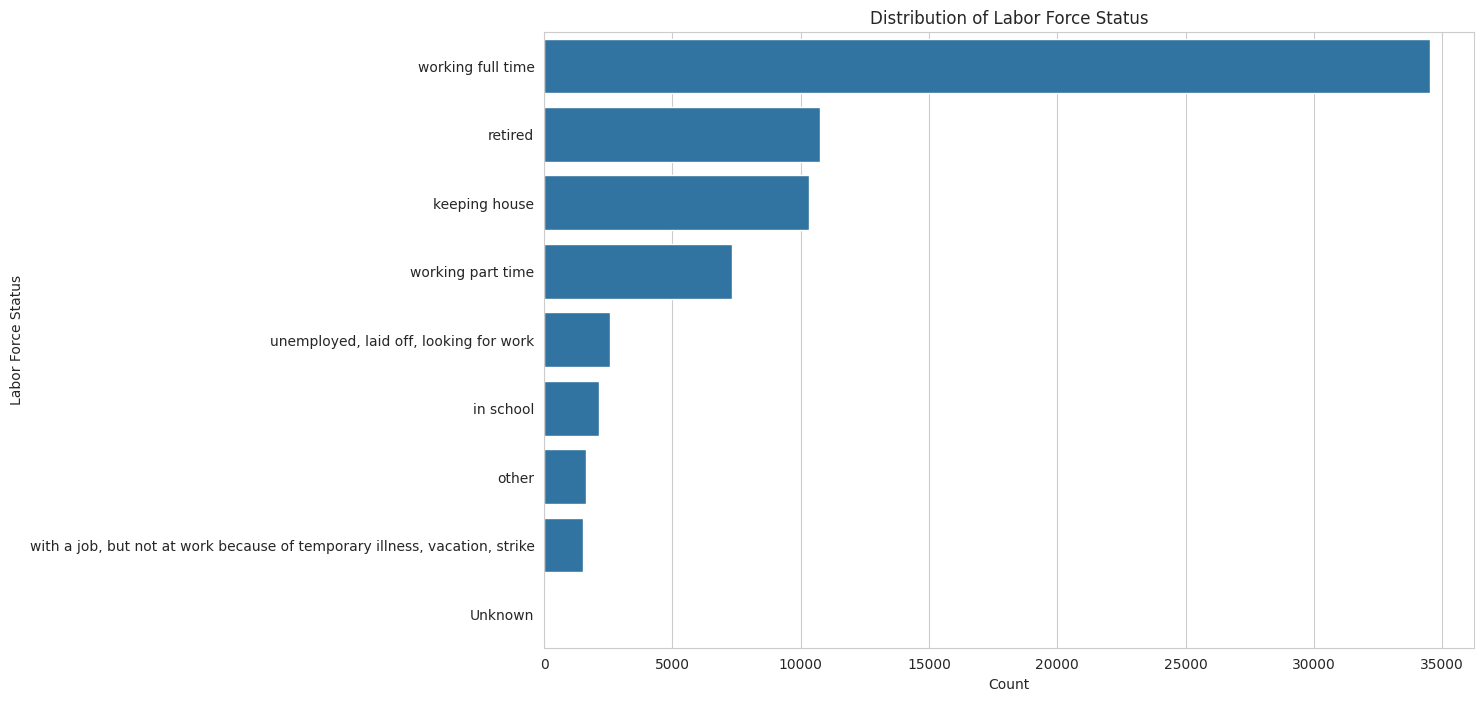

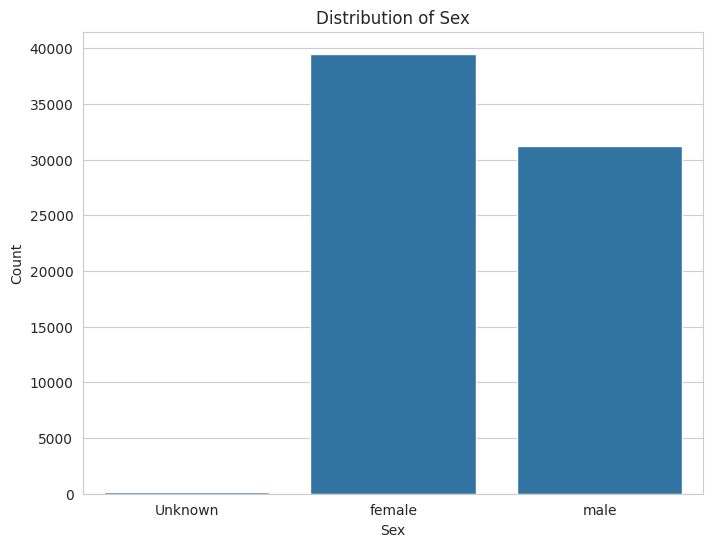

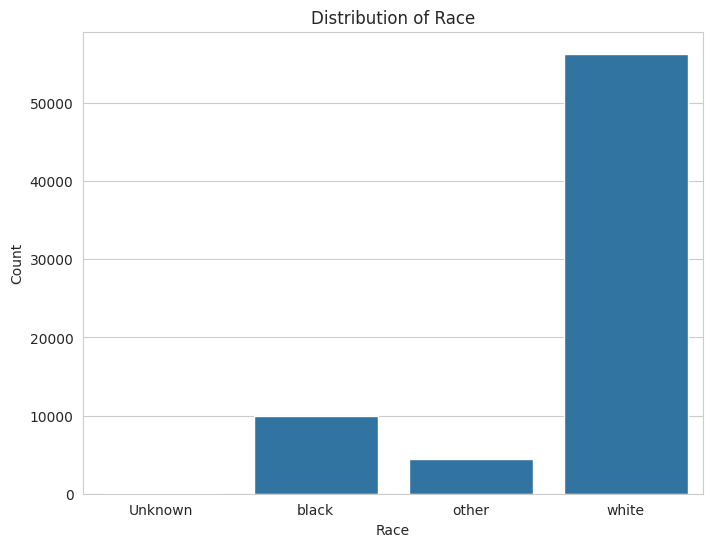

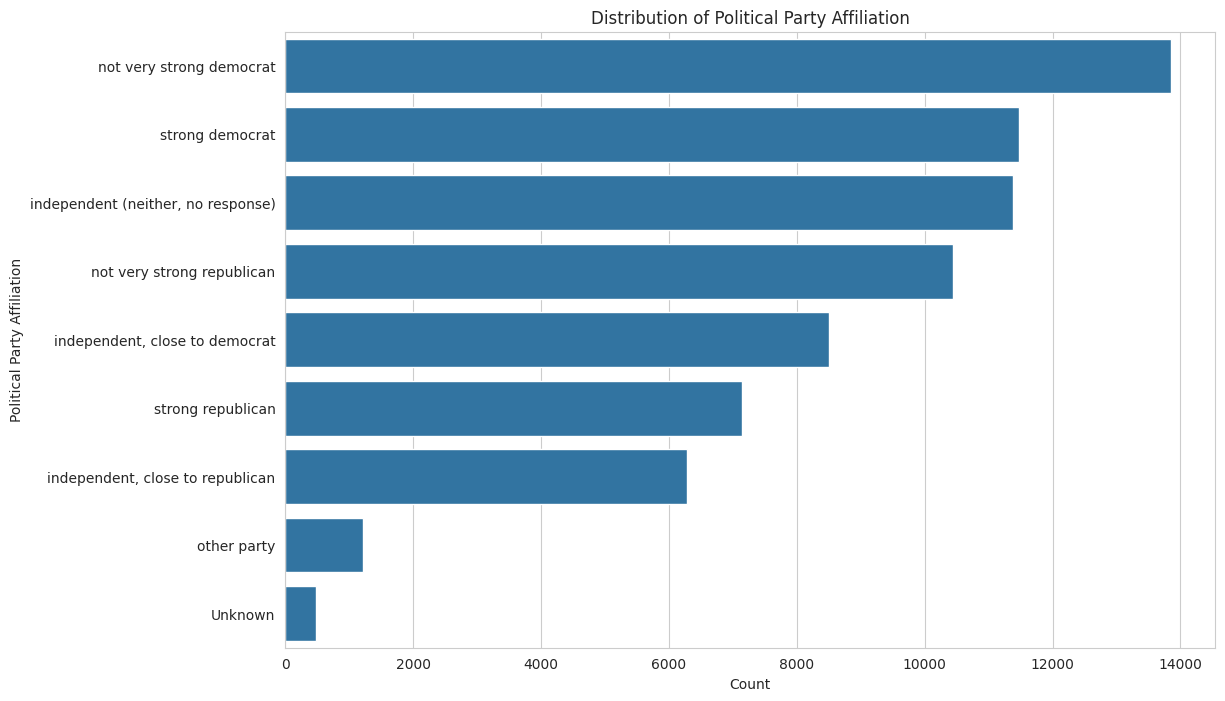

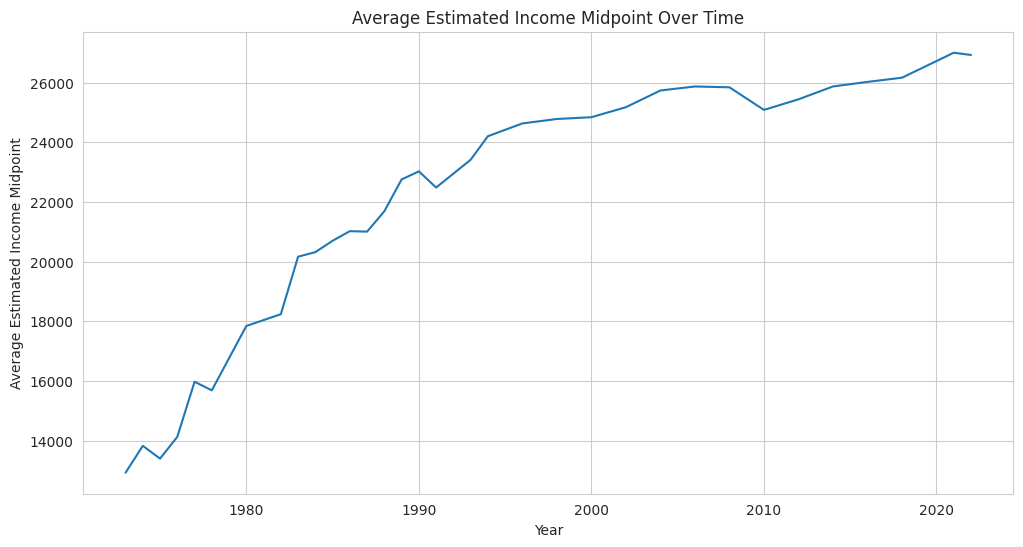

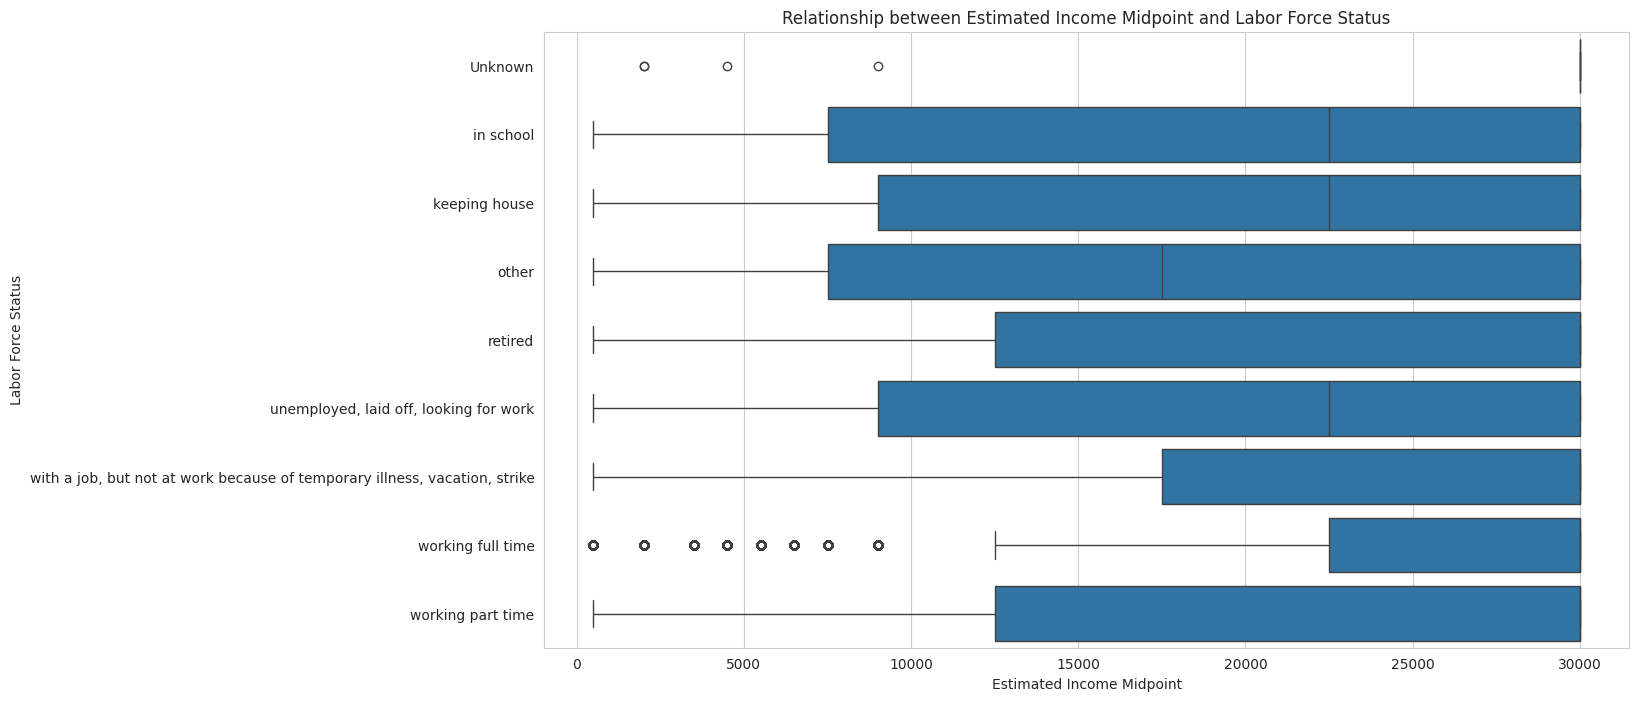

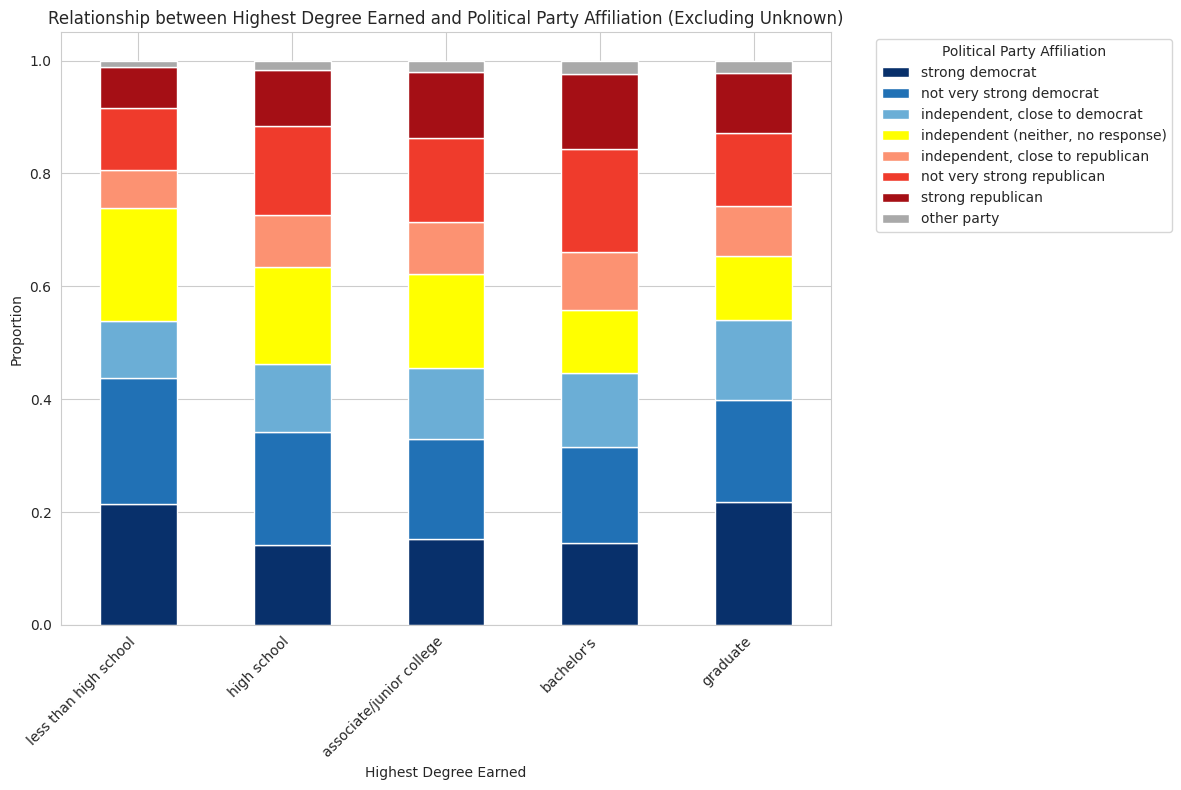

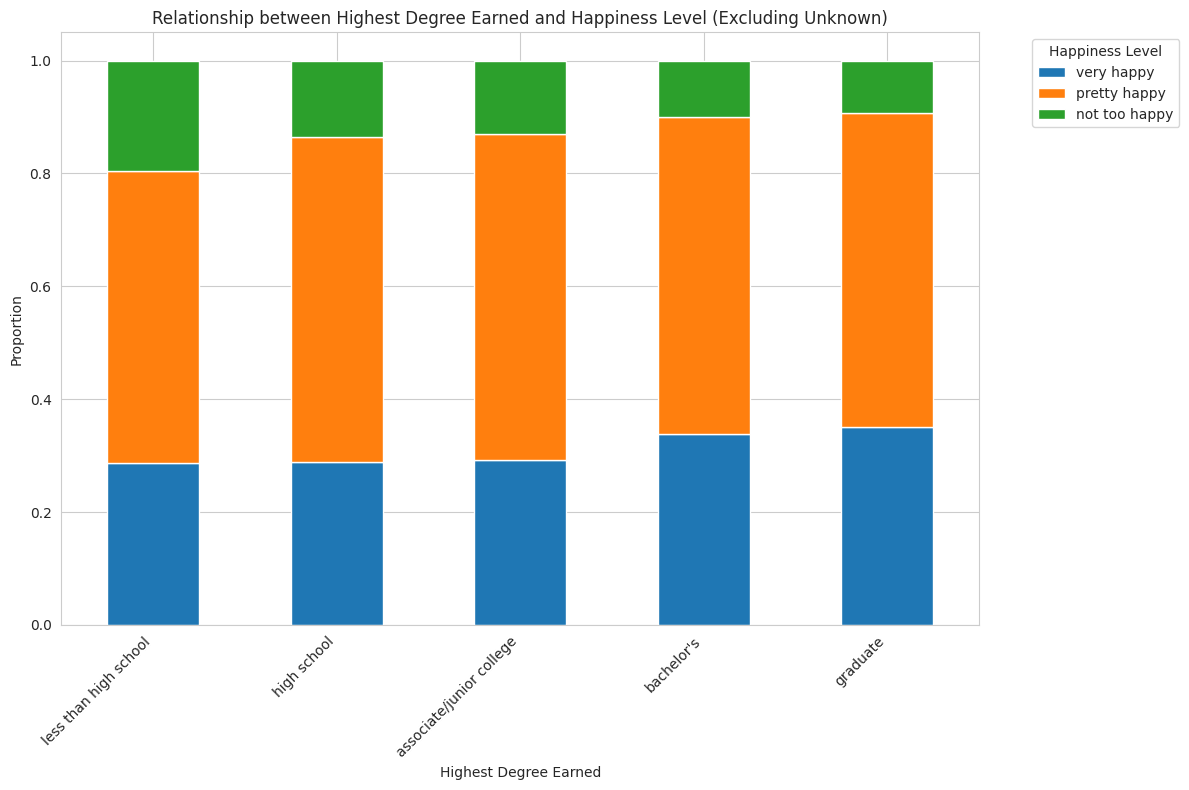

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# 1. Histogram of 'childs'
plt.figure(figsize=(10, 6))
sns.histplot(data=gss_df, x='childs', bins=range(0, int(gss_df['childs'].max()) + 2))
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.xticks(range(0, int(gss_df['childs'].max()) + 1))
plt.show()

# 2. Histogram of 'income_midpoint'
plt.figure(figsize=(10, 6))
sns.histplot(data=gss_df, x='income_midpoint', bins=20, kde=True)
plt.title('Distribution of Estimated Income Midpoint')
plt.xlabel('Estimated Income Midpoint')
plt.ylabel('Frequency')
plt.show()

# 3. Box plot of 'happy' vs 'income_midpoint'
plt.figure(figsize=(12, 8))
# Filter out 'Unknown' values from 'happy' column
sns.boxplot(data=gss_df[gss_df['happy'] != 'Unknown'], x='happy', y='income_midpoint', order=['very happy', 'pretty happy', 'not too happy'])
plt.title('Relationship between Happiness and Estimated Income Midpoint (Excluding Unknown)')
plt.xlabel('Happiness')
plt.ylabel('Estimated Income Midpoint')
plt.show()

# 4. Bar plot of 'degree' distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=gss_df, y='degree', order=gss_df['degree'].value_counts().index)
plt.title('Distribution of Highest Degree Earned')
plt.xlabel('Count')
plt.ylabel('Highest Degree Earned')
plt.show()

# 5. Stacked bar plot of 'marital' vs 'happy'
marital_happy = gss_df.groupby(['marital', 'happy']).size().unstack(fill_value=0)
marital_happy = marital_happy.apply(lambda x: x / x.sum(), axis=1) # Normalize to show proportions
marital_happy.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Relationship between Marital Status and Happiness')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Happiness', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 6. Bar plot of 'wrkstat' distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=gss_df, y='wrkstat', order=gss_df['wrkstat'].value_counts().index)
plt.title('Distribution of Labor Force Status')
plt.xlabel('Count')
plt.ylabel('Labor Force Status')
plt.show()

# 7. Bar plot of 'sex' distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=gss_df, x='sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# 8. Bar plot of 'race' distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=gss_df, x='race')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# 9. Bar plot of 'partyid' distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=gss_df, y='partyid', order=gss_df['partyid'].value_counts().index)
plt.title('Distribution of Political Party Affiliation')
plt.xlabel('Count')
plt.ylabel('Political Party Affiliation')
plt.show()

# 10. Line plot of 'year' and average 'income_midpoint'
# Calculate the average income_midpoint per year
average_income_by_year = gss_df.groupby('year')['income_midpoint'].mean().reset_index()

# line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_income_by_year, x='year', y='income_midpoint')
plt.title('Average Estimated Income Midpoint Over Time')
plt.xlabel('Year')
plt.ylabel('Average Estimated Income Midpoint')
plt.grid(True)
plt.show()

# 11. Box plot of 'income_midpoint' vs 'wrkstat'
plt.figure(figsize=(14, 8))
sns.boxplot(data=gss_df, x='income_midpoint', y='wrkstat')
plt.title('Relationship between Estimated Income Midpoint and Labor Force Status')
plt.xlabel('Estimated Income Midpoint')
plt.ylabel('Labor Force Status')
plt.show()

# 12. Stacked Bar plot of 'degree' and 'partyid'
# Filter out 'Unknown' values from 'degree' and 'partyid'
filtered_df = gss_df[(gss_df['degree'] != 'Unknown') & (gss_df['partyid'] != 'Unknown')].copy()
degree_order = ['less than high school', 'high school', 'associate/junior college', "bachelor's", 'graduate']
filtered_df['degree'] = pd.Categorical(filtered_df['degree'], categories=degree_order, ordered=True)
partyid_order = [
    'strong democrat', 'not very strong democrat', 'independent, close to democrat',
    'independent (neither, no response)', 'independent, close to republican',
    'not very strong republican', 'strong republican', 'other party'
]

filtered_df['partyid'] = pd.Categorical(filtered_df['partyid'], categories=partyid_order, ordered=True)

degree_partyid = filtered_df.groupby(['degree', 'partyid'], observed=True).size().unstack(fill_value=0)
degree_partyid = degree_partyid.apply(lambda x: x / x.sum(), axis=1) # Normalize to show proportions

# colors!!!
colors = {
    'strong democrat': '#08306B',            # Darker blue
    'not very strong democrat': '#2171B5',   # Medium blue
    'independent, close to democrat': '#6BAED6', # Lighter blue
    'independent (neither, no response)': '#FFFF00', # Yellow
    'independent, close to republican': '#FC9272', # Lighter red
    'not very strong republican': '#EF3B2C', # Medium red
    'strong republican': '#A50F15',          # Darker red
    'other party': '#A9A9A9'                 # Grey
}

# stacked bar plot
ax = degree_partyid.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors.get(col, '#808080') for col in degree_partyid.columns])

plt.title('Relationship between Highest Degree Earned and Political Party Affiliation (Excluding Unknown)')
plt.xlabel('Highest Degree Earned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Political Party Affiliation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 13. Stacked bar plot of 'degree' and 'happy'
filtered_df_edu_happy = gss_df[(gss_df['degree'] != 'Unknown') & (gss_df['happy'] != 'Unknown')].copy()
degree_order = ['less than high school', 'high school', 'associate/junior college', "bachelor's", 'graduate']

filtered_df_edu_happy['degree'] = pd.Categorical(filtered_df_edu_happy['degree'], categories=degree_order, ordered=True)
happy_order = ['very happy', 'pretty happy', 'not too happy']
filtered_df_edu_happy['happy'] = pd.Categorical(filtered_df_edu_happy['happy'], categories=happy_order, ordered=True)

degree_happy = filtered_df_edu_happy.groupby(['degree', 'happy'], observed=True).size().unstack(fill_value=0)
degree_happy = degree_happy.apply(lambda x: x / x.sum(), axis=1) # Normalize to show proportions

# stacked bar plot
degree_happy.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Relationship between Highest Degree Earned and Happiness Level (Excluding Unknown)')
plt.xlabel('Highest Degree Earned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Happiness Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

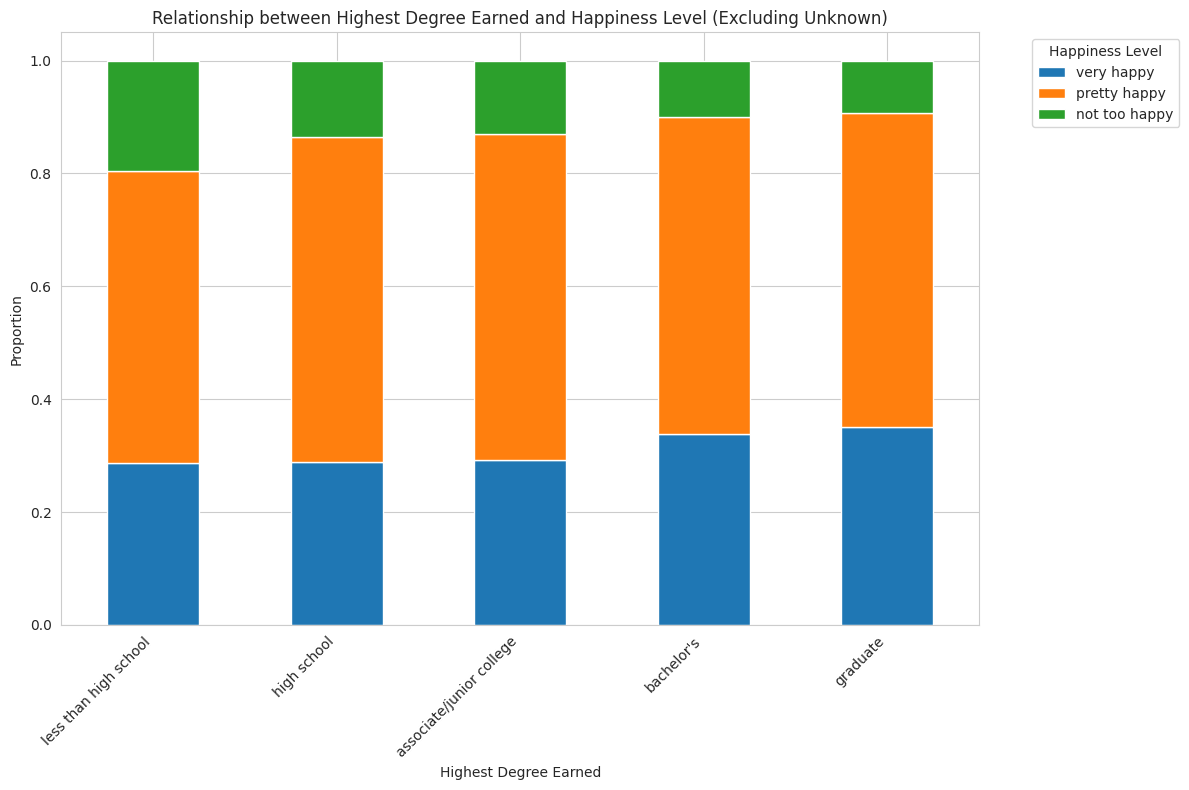

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out 'Unknown' values from 'degree' and 'happy'
filtered_df_edu_happy = gss_df[(gss_df['degree'] != 'Unknown') & (gss_df['happy'] != 'Unknown')].copy()

# Define the desired order for the 'degree' categories
degree_order = ['less than high school', 'high school', 'associate/junior college', "bachelor's", 'graduate']

# Convert 'degree' to a categorical type with the specified order
filtered_df_edu_happy['degree'] = pd.Categorical(filtered_df_edu_happy['degree'], categories=degree_order, ordered=True)

# Define the desired order for 'happy' categories
happy_order = ['very happy', 'pretty happy', 'not too happy']

# Convert 'happy' to a categorical type with the specified order
filtered_df_edu_happy['happy'] = pd.Categorical(filtered_df_edu_happy['happy'], categories=happy_order, ordered=True)


# Calculate the proportion of happy for each degree
degree_happy = filtered_df_edu_happy.groupby(['degree', 'happy'], observed=True).size().unstack(fill_value=0)
degree_happy = degree_happy.apply(lambda x: x / x.sum(), axis=1) # Normalize to show proportions

# Create a stacked bar plot
degree_happy.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Relationship between Highest Degree Earned and Happiness Level (Excluding Unknown)')
plt.xlabel('Highest Degree Earned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Happiness Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Findings:

Based on the exploratory data analysis we performed, we have found that the dataset contains 70,777 entries with our 10 chosen columns, with missing values present in several columns. Most notably 'income' and 'happy' had the most missing values. Missing categorical values were imputed with 'Unknown', and missing numerical values in 'childs' were filled with the median. We made this decision because we did not want to assume that missing values meant no children. The average number of children reported is around 1.91, with a median of 2 and a mode of 0. The 'income' column was converted to an 'income_midpoint' using range midpoints so we could better analyze and concatenate with other data. Missing values were filled by the median of this new column. Unfortunately, the income measurement range only went up to > 25,000 so the data is is constrained heavily by that. The estimated median and mode income midpoint is \$30,000 (which is the highest their measurement went up to), while the mean is lower at approximately \$22,965, suggesting a right-skewed income distribution. Visualizations show that the majority of respondents are "pretty happy" or "very happy".

Married individuals appear to report higher levels of happiness compared to other marital statuses. However, widowed respondents also show relatively higher happiness than separate respondents. The highest educational degree earned by respondents is varied, with a significant portion holding a high school diploma or less. The most common labor force status is "working fulltime" with "retired" and "keeping house" being around 1/3 the frequency. There is a roughly even distribution between male and female respondents, but a slightly higher proportion of female respondents. The majority of respondents identified as White, and the categories must have not been descriptive enough to make the representative differences apparent. Political party affiliation is diverse, with a notable number identifying as Independent or leaning towards the Democratic or Republican parties. It was roughly even and representative of general popular vote findings in the US (slightly more Democrats compared to Republicans). Further investigation into the relationship between income and happiness, potentially controlling for other demographic factors, could provide deeper insights, but the boxplots suggest income and happiness are somewhat correlated. If the income column had a better range, above 25,000, the data may have revealed better insights about this relationship. Analyzing trends in income and happiness over the years included in the dataset could reveal societal shifts.

When using more comparative analysis outside of exploratory plots, we can see some preliminary findings that show a relationship between income_midpoint and our wrkstat column. People working full time or those on temporary leave make more than their in school, keeping house, and retired counterparts. This relationship is shown via a box plot. When comparing degree (level of education) and partyid (political party affiliation) there seems to be an interesting parabolic relationship between education level and voting patterns. As the degrees increase, the respondents tend to become more conservative, except for those with graduate/professional degrees who return to far more liberal voters. Strong democrats seem to be of the same proportion for those who responded high school or less with those who hold graduate degrees. People seem to become more decisive with further education too with strong republican/strong democrat becoming larger proportions and independent, no response becoming a smaller proportion of respondents. Finally, there seems to be a relationship between happiness and level of education. While very slight, there is a trend that shows that higher degrees are correlated with more respondents saying they are happy. In general, the least happy individuals are those with a high school or less education while the highest happiness is found with those with graduate degrees.